# 20221025

- AI 강의 정리

---

## Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tfk.layers

## 데이터 정의

* (옵션) tf.data로 batch 사용 가능
  * 1개의 batch가 한번에 들어가서 평균을 계산해 weight 개선하는 (GD) 하는 방법 = SGD

In [ ]:
n_feat = 4
n_data = 1000

xdata = np.random.rand(n_data, n_feat)
ydata = np.round(np.random.rand(n_data))

## 모델 정의

In [ ]:
x = tfk.Input((4,), name='input')

In [ ]:
model = tfk.Sequential([
    tfkl.Dense(25, 'sigmoid', name='hid1'),
    tfkl.Dense(15, 'sigmoid', name='hid2'),
    tfkl.Dense(1, 'sigmoid', name='out')
])

In [ ]:
model(x)

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential_2')>

In [ ]:
hid1 = model.get_layer('hid1')

In [ ]:
w, b = hid1.weights

In [ ]:
w.shape, b.shape

(TensorShape([4, 25]), TensorShape([25]))

## 컴파일

* optimizer : back propargate를 위한 최적화 방법
  * SGD (stochastic gradient descent)
  * RMSprop
  * Adam
  * Adadelta
  * Adagrad
  * Adamax
  * Nadam
  * Ftrl
* loss : 오차 정의
  * BinaryCrossentropy class :이진분류 loss 정의
  * CategoricalCrossentropy class :다중분류 loss 정의
  * MeanSquaredError class :평균제곱법
* metrics : log 기록

In [ ]:
model.compile(loss=tfk.losses.BinaryCrossentropy())

## 훈련 시작

* epochs : 훈련 반복 횟수
* parameter (현재 코드에는 적용 X)
  * batch_size
  * ...

In [ ]:
%%time
history = model.fit(xdata, ydata, epochs=1000, verbose=2)

32/32 - 0s - loss: 0.6845 - 60ms/epoch - 2ms/step
Epoch 997/1000
32/32 - 0s - loss: 0.6846 - 57ms/epoch - 2ms/step
Epoch 998/1000
32/32 - 0s - loss: 0.6849 - 55ms/epoch - 2ms/step
Epoch 999/1000
32/32 - 0s - loss: 0.6845 - 55ms/epoch - 2ms/step
Epoch 1000/1000
32/32 - 0s - loss: 0.6849 - 58ms/epoch - 2ms/step
CPU times: user 1min 4s, sys: 3.82 s, total: 1min 8s
Wall time: 1min 21s


In [ ]:
history.history.keys()

dict_keys(['loss'])

In [ ]:
loss = history.history['loss']

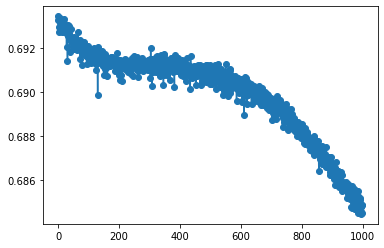

In [ ]:
plt.plot(loss, 'o-')

## 모델 사용해보기 (inference, 추론)

In [ ]:
x_test = np.random.rand(1,4)

In [ ]:
x_test

array([[0.98523497, 0.33753705, 0.9751283 , 0.02862008]])

In [ ]:
model.predict(x_test)

1/1 [==============================] - 0s 45ms/step


array([[0.54638034]], dtype=float32)

In [ ]:
model.predict([[0,0,0,0]])

1/1 [==============================] - 0s 31ms/step


array([[0.7511709]], dtype=float32)

In [ ]:
model.predict([[1,1,1,1]])

1/1 [==============================] - 0s 68ms/step


array([[0.55797845]], dtype=float32)

# 추가 개념

* 순전파 (forward propagation) -> 순서대로 변수 계산 및 저장
* 역전파 (back propagation) -> gradient 계산 (미분 및 업데이트)
  
### .

* tensorflow 라이브러리
  * JAX 

### . 

* 활성화 함수 (Activation)
  * 종류
    * Sigmoid
    * ReLU
    * Tanh
    * leaky ReLU, ELU, SeLU ...
  * Output layer의 activation은 데이터의 형태에 맞게 사용해야 함.
  * hidden layer의 activation은 주로 ReLU를 사용

